# 

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Project Objectives

Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook Final Report.

Create modules (wrangle.py) that make your process repeateable and your report (notebook) easier to read and follow.

Ask exploratory questions of your data that will help you understand more about the attributes and drivers of home value. Answer questions through charts and statistical tests.

Construct an classification model that predict programmaning language.

Make recommendations to a data science team about how to improve predictions.

Be prepared to answer panel questions about your code, process, findings and key takeaways, and model.


# Business Goals:

My goal is to find key driver for programmaning language

Construct an classification model that predict programmaning language.

Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.

Make recommendations on what works or doesn't work in prediction programmaning language.


# Questions:

• Are the mean count_values of Unique Words in Each Language equal to the Population in relation to Non-Repeating Words for the ReadMes?

• Is the distribution of Count of Common words unique to a language a cood indicator of that language (Porportionality)?



# Steps:
1-Data acquistion 

2-Preparation

3-Exploratory data analysis 

4-Modeling 

5-Model evaluation

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
import os
import json
from typing import Dict, List, Optional, Union, cast
from IPython.display import display
from ipywidgets import IntProgress
import requests
import pandas as pd
from bs4 import BeautifulSoup
import acquire
import time
from requests import get
from env import github_token, github_username
import matplotlib.pyplot as plt
import seaborn as sns 
import prepare
import numpy as np
import acquire
import Modeling
import unicodedata
import re
import json
from wordcloud import WordCloud

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import acquire
# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
α = .05
alpha= .05
from sklearn.impute import SimpleImputer
#image
from IPython.display import Image
from IPython.core.display import HTML 
import wrangle_cristian

# 1)Acquire:

In [2]:
#take a while to acquire new repo everytime from github
df2=wrangle_cristian.csv_git()

In [3]:
df=wrangle_cristian.acquire_data()

# Acquire takeaways:

- acquire from github

- acquire 100 repos updated each time 


# 2)Prepare/split:

In [4]:
df=wrangle_cristian.prepare_df(df)

In [5]:
#split the data into train,val,test
train,validate,test=wrangle_cristian.train_validate_test_split(df, 'clean_lang')
train.shape,validate.shape,test.shape

((44, 14), (20, 14), (16, 14))

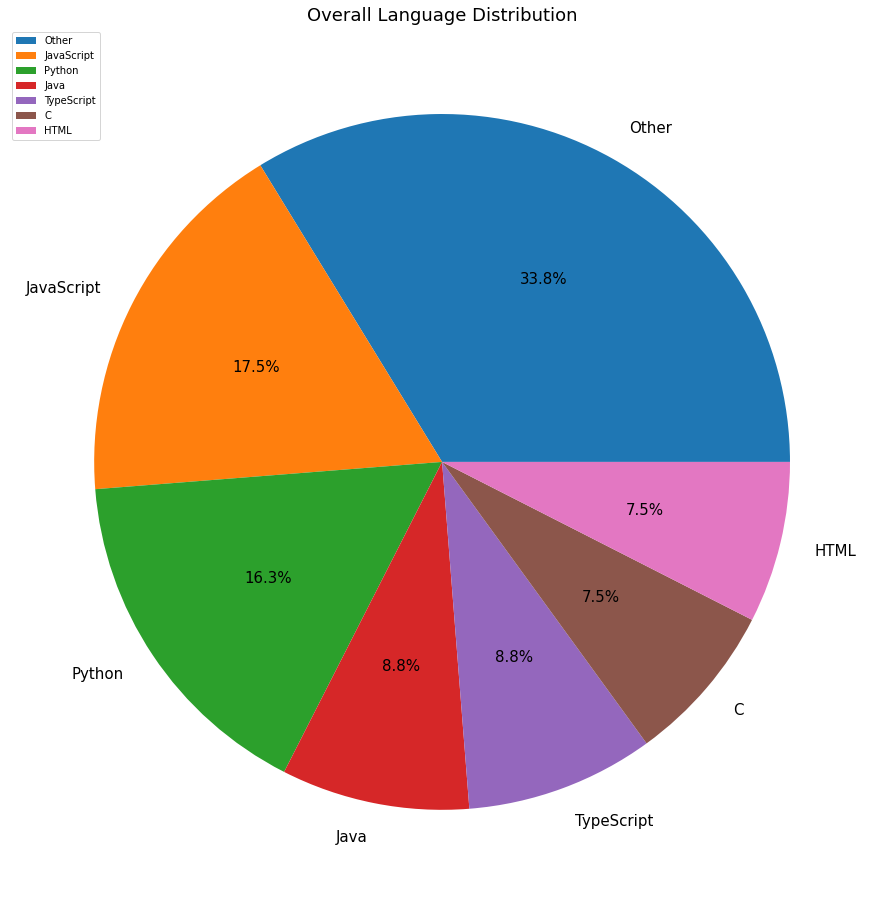

In [6]:
wrangle_cristian.pie_chart1(df)

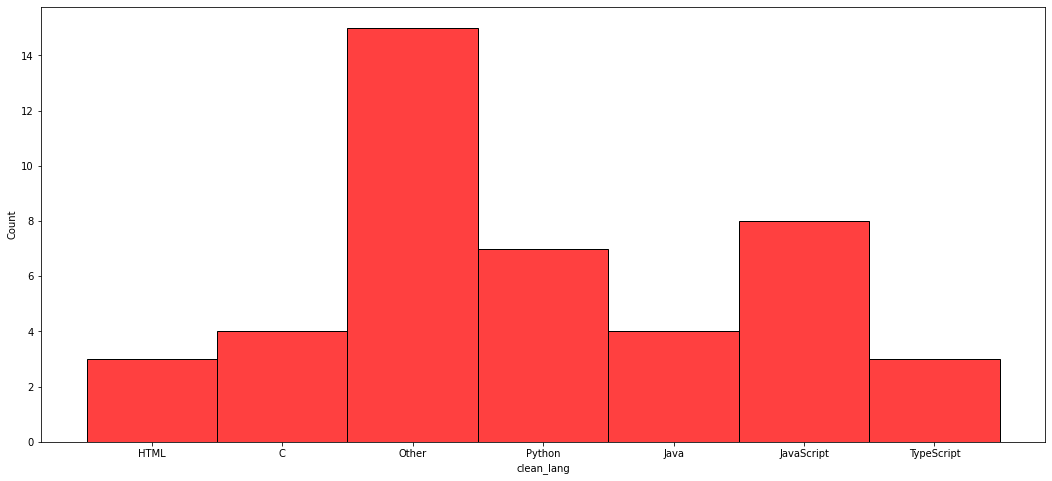

In [7]:
wrangle_cristian.pie_chart(train)

# Prepare/split takeaways:

-  Test is 20% of the original dataset, validate is .30*.80= 24% of the original dataset, and train is .70*.80= 56% of the original dataset

- Prepared the data by creating columns 

- Counted a match on unique wordcount for each language for most common
- Sorted Languages and returned word counts
- Distributions of primary languages are relatively similar

# Dictianary 
|Attribute|Old keys|        Data type   |       Definition   |
| -------- |-------- | -------- | -------- | 
|repo |repo|object |  temp|
|readme_contents |readme_contents|object |temp
|clean|N/A|object | location |
|stemmed |N/A|object|split into years 
|lemmatized |N/A|object |temp/usa method |
|count_set_lem |N/A |int |temp/usa method|
|clean_lang |N/A |object |date|

# 3)Exploration:

# Hypotheses:

`Hypotheses1:`
Are the mean count_values of Unique Words in Each Language equal to the Population in relation to Non-Repeating Words for the ReadMes

`H0:`The mean values of Non-Repeating Words(Readme)_langauge will not be signifcantly different from Non-Repeating Words(Readme)_population.

`Ha:`Rejection of Null The mean values of Non-Repeating Words(Readme)_langauge will not be signifcantly different from Non-Repeating Words(Readme)_population.

`Hypotheses-2:`
Is the distribution of Count of Common words unique to a language a cood indicator of that language (Porportionality)


`H0:`The distribution of Non-Repeating Words(Readme)_langauge will be consistent between languages.

`Ha:`Rejection of Null The distribution of Non-Repeating Words(Readme)_langauge will be consistent between languages..

`Hypotheses-3:`

does the length of the repo readme (word amount) vary by language

`Hypotheses-4:`

is the most common words in a readme related to the top 95% of words most common to a language for a majority (boolean class)

`Hypotheses-5:`

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses1:`Are the mean count_values of Unique Words in Each Language equal to the Population in relation to Non-Repeating Words for the ReadMes

`H0:`The mean values of Non-Repeating Words(Readme)_langauge will not be signifcantly different from Non-Repeating Words(Readme)_population.

`Ha:`Rejection of Null The mean values of Non-Repeating Words(Readme)_langauge will not be signifcantly different from Non-Repeating Words(Readme)_population.

count_set_lem <-target | clean_lang <-population name | Other <-sample name
We fail to reject the null hypothesis ( Other as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=-0.92824, p=0.36182
----------
count_set_lem <-target | clean_lang <-population name | JavaScript <-sample name
We fail to reject the null hypothesis ( JavaScript as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=-0.40971, p=0.68869
----------
count_set_lem <-target | clean_lang <-population name | Java <-sample name
We fail to reject the null hypothesis ( Java as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=0.90863, p=0.39857
----------
count_set_lem <-target | clean_lang <-population name | Python <-sample name
We fail to reject the null hypothesis ( Python as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=0.76707, p=0.45787

ValueError: num must be 1 <= num <= 6, not 7

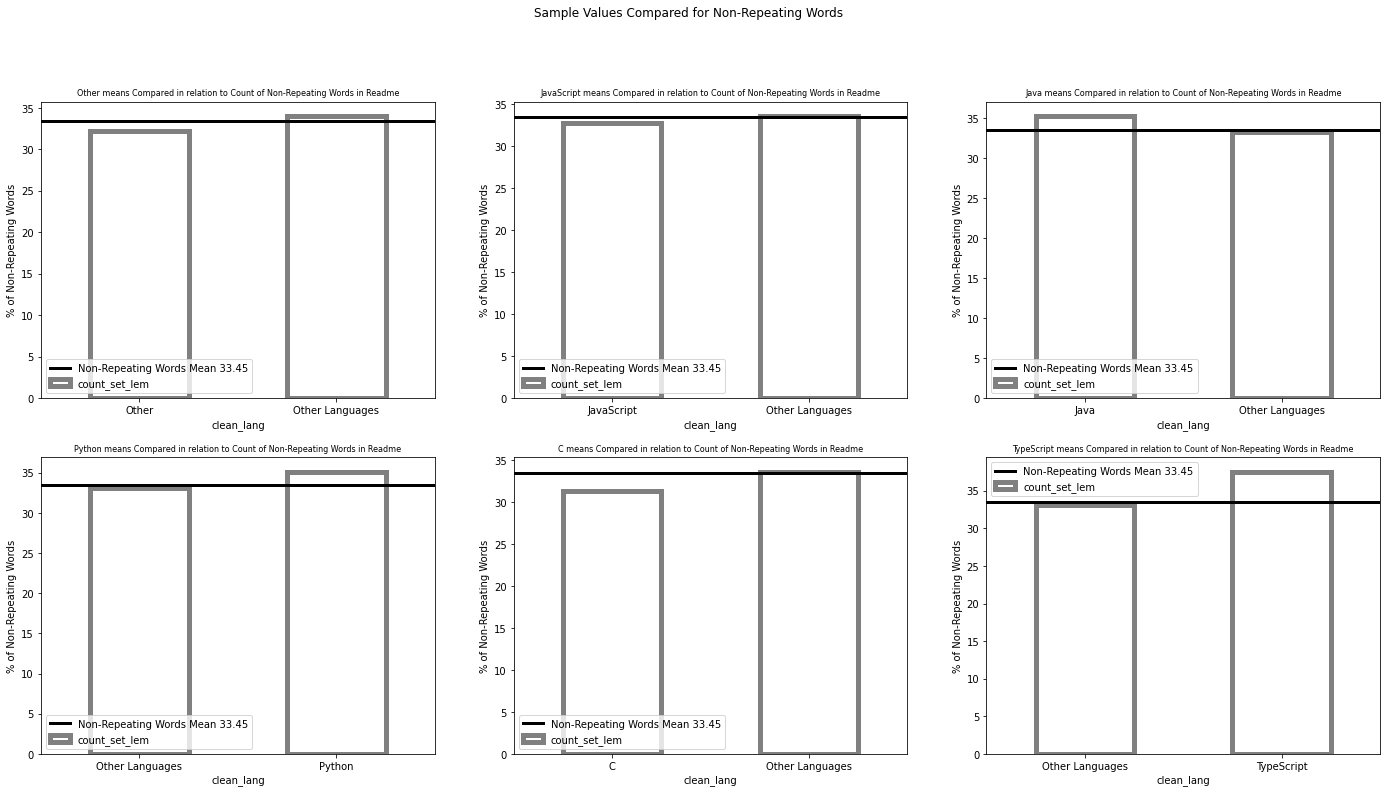

In [8]:
#wont alaways work if lang is more then 6 or less then 6
wrangle_cristian.explore_ttest_lang_setcount(df)

# Takeaways:
- The languages of Python, Other, and HTML share similar values in their word count set "uniqueness"
This is not a good feature to use to determine Language for these values
- The languages of Java, TypeScript, and JavaScript are unique in their word count set "uniqueness"
This is a good feature to use to determine Language for these values


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-2:`Is the distribution of Count of Common words unique to a language a cood indicator of that language (Porportionality)


`H0:`The distribution of Non-Repeating Words(Readme)_langauge will be consistent between languages.

`Ha:`Rejection of Null The distribution of Non-Repeating Words(Readme)_langauge will be consistent between languages..

alpha = .05

In [ ]:
#wont alaways work if lang is more then 6 or less then 6 
wrangle_cristian.chi2_for_lang(train)

# Takeaways:
- Using Count Unique Words for each language holds different porportions from what would be a normal distribution, and as such is a good indicator for use in modeling to predict our class.
- In all cases the percentage difference between expected and observed is pretty good and indicates it will be applicable across a large portion of the dataset

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-3:`

does the length of the repo readme (word amount) vary by language

In [ ]:
wrangle_cristian.graph2(df)

In [ ]:
#stats test:
# Perform 1 sample t-test comparing mean length of stemmed README file per language to the overall average length (all languages)
# Set significance level to 0.05
# stat_test(train, 'word_count')

In [9]:
wrangle_cristian.stat_test(df, train)

NameError: name 'count_set_words' is not defined

In [ ]:
def stat_test(lang, readme_length):
    '''
    Perform 1 sample t-test comparing mean length of original
    README file per language to the overall average length (all languages)
    set the significance level to 0.05
    '''
    lang_dict={"Language":[],"Words":[]}
    for lang in df["clean_lang"].unique():
        lang_dict["Language"].append(lang)
        lang_dict["Words"].append((" ".join(df[df["clean_lang"]==lang]["lemmatized"])).replace("'","").split())
    lang = pd.DataFrame(lang_dict)
    most_common_list=[]
    for i,each in enumerate(lang["Language"].unique()):
        looped_series = pd.Series(lang["Words"].loc[i]).value_counts()
        most_common = looped_series[looped_series > looped_series.quantile(.95)]
        most_common_list.append(most_common[:5].index.tolist())
    lang["most_common"] = pd.Series(most_common_list)
    lang["count_set_words"] = lang["Words"].apply(set).apply(len)
    alpha = 0.05
    overall_mean_length_readme = lang[readme_length].mean()
    for l in train.language.unique():
        sample = train[train.language == l]
        t,p = stats.ttest_1samp(sample[readme_length], overall_mean_length_readme)
        print(l, round(t,5), p<alpha)
        
    return stat_test

# Takeaways:
- 
- 
-  


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-4:`

is the most common words in a readme related to the top 95% of words most common to a language for a majority (boolean class)

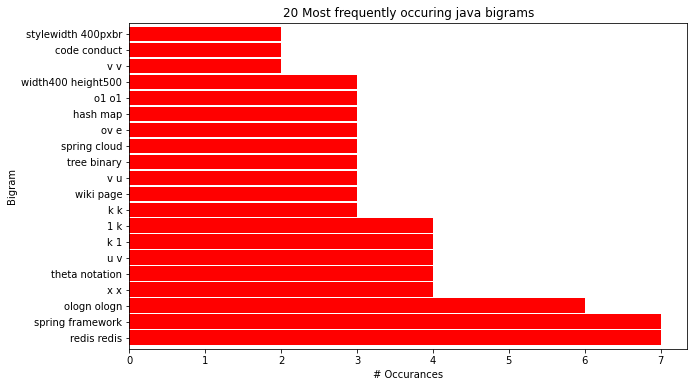

In [10]:
wrangle_cristian.java_bigrams(df,train)

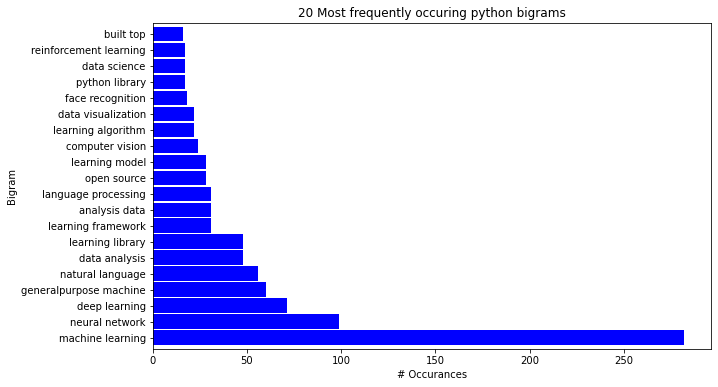

In [11]:
wrangle_cristian.Python_bigrams(df,train)

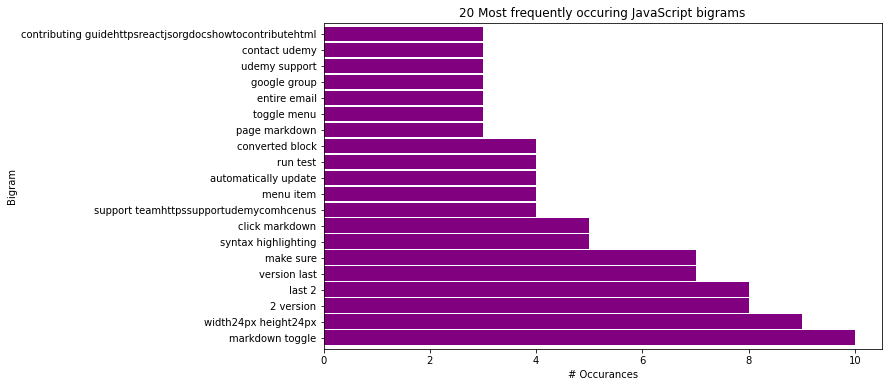

In [12]:
wrangle_cristian.JavaScript_bigrams(df,train)

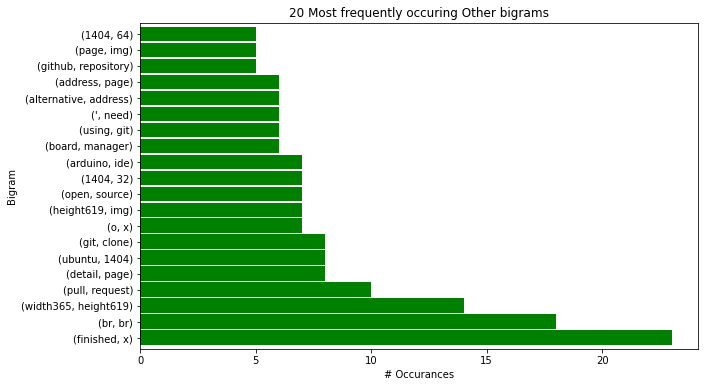

In [13]:
wrangle_cristian.other_bigrams(df,train)

# Explore Takeaways:


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# 4)Modeling:

Use selected features or clustered data to predict the target logerror

Algorithms used:

•KNeighborsClassifier()

•RandomForestClassifier(max_depth=10)

•DecisionTreeClassifier at depth(7)

Best model:

•best model is DecisionTreeClassifier at depth(7)

In [14]:
wrangle_cristian.baseline1(train)

AttributeError: 'DataFrame' object has no attribute 'y'

In [15]:
# dropping the following columns 'repo','readme_contents','clean','stemmed','lemmatized','clean_lang'
X_train,y_train,X_validate,y_validate,X_test,y_test=wrangle_cristian.getting_ready(train,validate,test)

In [16]:
#pulling from my model.py for the following functions to work.
#creating 3 different models to conclude whichone is the best one 
dt_model1, rf_model, knn1_model = wrangle_cristian.score_models(X_train, y_train, X_validate, y_validate)

DecisionTreeClassifier(max_depth=7, random_state=123)

train score: 
              precision    recall  f1-score   support

           C       1.00      1.00      1.00         4
        HTML       1.00      1.00      1.00         3
        Java       1.00      1.00      1.00         4
  JavaScript       1.00      0.88      0.93         8
       Other       0.93      0.93      0.93        15
      Python       1.00      0.86      0.92         7
  TypeScript       0.60      1.00      0.75         3

    accuracy                           0.93        44
   macro avg       0.93      0.95      0.93        44
weighted avg       0.95      0.93      0.94        44

validate score: 
              precision    recall  f1-score   support

           C       0.33      1.00      0.50         1
        HTML       0.00      0.00      0.00         2
        Java       1.00      0.50      0.67         2
  JavaScript       0.33      0.67      0.44         3
       Other       0.50      0.29      0.36   

# Modeling Takeaways:
- 
- 
- 


# 5)Best Model:

• DecisionTreeClassifier perform the best with a f1-score of 90% performing 7 percent better then the baseline.

In [ ]:
wrangle_cristian.best_model(X_test,y_test)

In [ ]:
wrangle_cristian.decision_tree_graph(X_test, y_test)

# Best Model takeaways:
- 
- 
- 

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Conclusion/Recommnedations/Next Steps:
`Conclusion:`

- A large portion of ReadMe content was unusual words and mispellings
- Common Unique Word Count creation was able to show difference in Language prediction
- Feature sets informed by wordcounts performed best on model through validation phase
- Best model utilized combination of word count per language and overall counts per word
- Model gain on predictive performance vs. baseline prediction was decent on test set
- Baseline accuracy: ~20%
- Test model accuracy: ~40% (Higher is better)

`Recommendations:`

- I recommen that we check if anything happen when the temp got cold if any natural disasters happened.

- We cant change mothernatural but we could predict it at a close percentage. 

`Next Steps:`

- Dive deeper into what makes each language's ReadMe unique
- Take a look at adding more features into the model to create a more robust predictor
- Boolean values on significance (common unique word count passes threshould)
- Investigate features highlighted by RFE and see how they perform
- Possible look at reducing variation within features by analyzing significance
- Identify features were Language variation was driven by primarly outliers (looking at you HTML)
- May consider creating different or tailored specific models
- Take different approach to combining the data
- Rely more on the raw features rather than feature engineering

# Steps to reproduce finalnotebook:
data set was collected from github mostforks(https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories)


1)Download the following files 

• Wrangle.py

•'.csv'

• finalnotebook.pynd

2) After downloading files make sure all files are in the same folder or location 

3) Onces step two and step one are done you would be able to run finalnotebook without errors and on your own 